In [1]:
import pandas as pd
import plotly.express as px

In [41]:
df_서울_발표전.groupby('자치구명')["물건금액(만원)"].count().reset_index()

,자치구명,물건금액(만원)
0,강남구,1563
1,강동구,1522
2,강북구,951
3,강서구,1778
4,관악구,1052
5,광진구,748
6,구로구,1090
7,금천구,679
8,노원구,1336
9,도봉구,857


In [42]:
df_서울_발표전.groupby('자치구명')["발표"].count().reset_index()

,자치구명,발표
0,강남구,1563
1,강동구,1522
2,강북구,951
3,강서구,1778
4,관악구,1052
5,광진구,748
6,구로구,1090
7,금천구,679
8,노원구,1336
9,도봉구,857


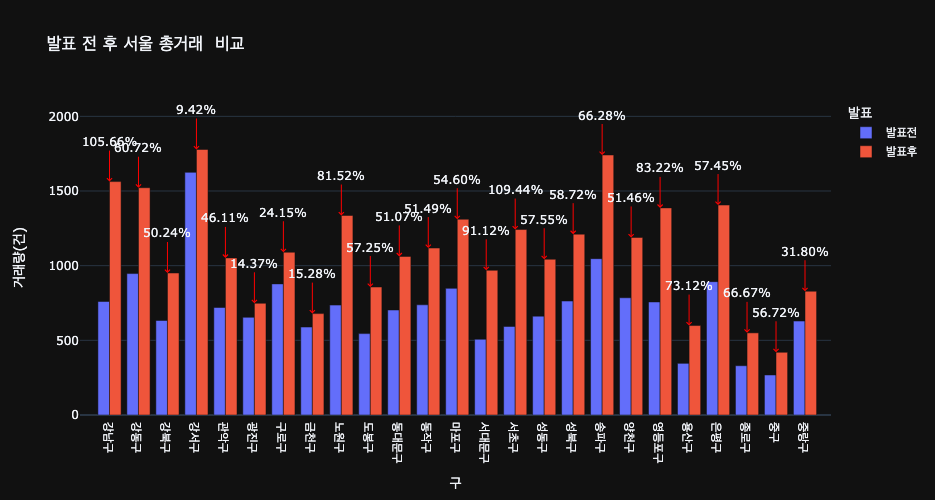

In [21]:
df_서울=pd.read_csv("data/df_서울.csv")

df_서울_발표전=df_서울.loc[df_서울['발표']=='발표전', :]
df_서울_발표후=df_서울.loc[df_서울['발표']=='발표후', :]

서울_after_avg=df_서울_발표전.groupby('자치구명')['물건금액(만원)'].count().reset_index()
서울_before_avg=df_서울_발표후.groupby('자치구명')['물건금액(만원)'].count().reset_index()

병합데이터=pd.concat([서울_before_avg.assign(발표='발표전'),서울_after_avg.assign(발표='발표후')])


fig=px.bar(병합데이터,
           x='자치구명',
           y='물건금액(만원)',
           color='발표',
           barmode='group',
           title='발표 전 후 서울 총거래  비교',
           labels={'자치구명': '구', '물건금액(만원)': '거래량(건)'},
           template='plotly_dark',  # Dark mode template
           width=900,  # Width of the plot
           height=500,  # Height of the plo
           )
for sgg in 병합데이터['자치구명'].unique():
    before_count = 서울_before_avg[서울_before_avg['자치구명'] == sgg]['물건금액(만원)'].values[0]
    after_count = 서울_after_avg[서울_after_avg['자치구명'] == sgg]['물건금액(만원)'].values[0]
    percent_increase = ((after_count - before_count) / before_count) * 100
    fig.add_annotation(
        x=sgg,
        y=max(before_count, after_count),
        text=f'{percent_increase:.2f}%',
        showarrow=True,
        arrowcolor='red',
        arrowhead=4,
        ax=0,
        ay=-40
    )
    
fig.show()

# 여기서부터 김포입니다.

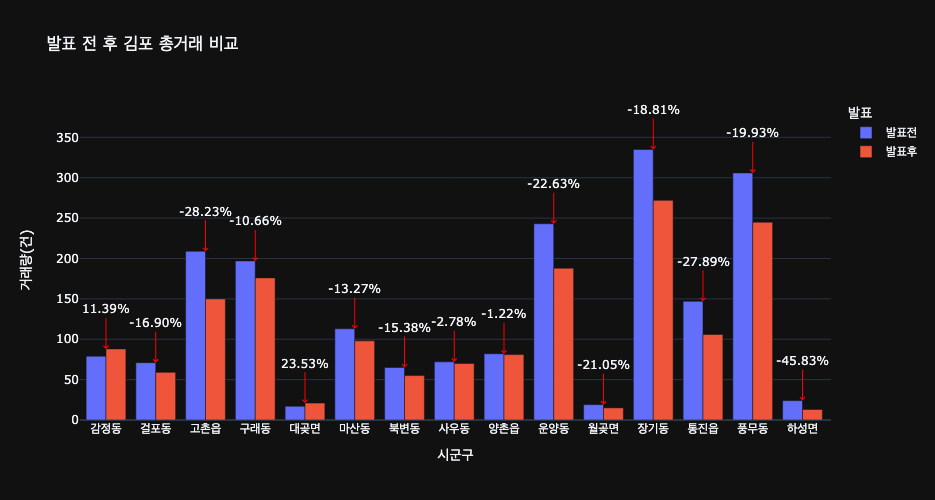

In [22]:
df_김포=pd.read_csv("data/df_김포.csv")

df_김포_발표전=df_김포.loc[df_김포['발표']=='발표전', :]
df_김포_발표후=df_김포.loc[df_김포['발표']=='발표후', :]

김포_before_avg=df_김포_발표전.groupby('시군구')['거래금액(만원)'].count().reset_index()
김포_after_avg=df_김포_발표후.groupby('시군구')['거래금액(만원)'].count().reset_index()

병합데이터=pd.concat([김포_before_avg.assign(발표='발표전'),김포_after_avg.assign(발표='발표후')])


fig = px.bar(병합데이터,
            x='시군구',
            y='거래금액(만원)',
            color='발표',
            barmode='group',
            title='발표 전 후 김포 총거래 비교',
            labels={'시군구': '시군구', '거래금액(만원)': '거래량(건)'},
            template='plotly_dark',  # Dark mode template
            width=900,  # Width of the plot
            height=500,)

for sgg in 김포병합['시군구'].unique():
    before_count = 김포B[김포B['시군구'] == sgg]['거래금액(만원)'].values[0]
    after_count = 김포A[김포A['시군구'] == sgg]['거래금액(만원)'].values[0]
    percent_increase = ((after_count - before_count) / before_count) * 100
    fig.add_annotation(
        x=sgg,
        y=max(before_count, after_count),
        text=f'{percent_increase:.2f}%',
        showarrow=True,
        arrowcolor='red',
        arrowhead=4,
        ax=0,
        ay=-40
    )

fig.show()